# Data cleaning

在底下的操作中以 [Titanic](https://www.kaggle.com/competitions/titanic/data?select=train.csv) 裡 train.csv 中的 Age 為例

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [206]:
df = pd.read_csv('train.csv')
age = df['Age']

In [207]:
print(age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


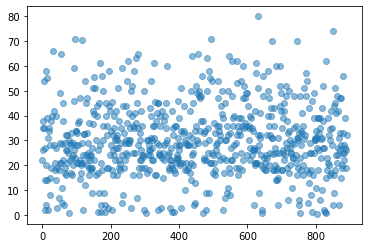

In [208]:
plt.scatter(age.index,age,alpha=0.5)
plt.show()

## missing data handling
- 移除

    ```python
    dropna()
    ```

- 填充

    ```python
    fillna(any_val)
    ```

In [209]:
# 移除
tmp = age.dropna()

In [210]:
# 填充
# 用平均填補
mean = age.fillna(age.mean())

# 用中位數填補
median = age.fillna(age.median())

# 用眾數填補
mode = age.fillna(age.mode())

## outlier handling
- $\pm$ 3 std (需假設資料為常態分佈)
- $\pm$ 1.5 IQR
- 其他工具
    - IsolationForest
    - Local Outlier Factor

### $\pm$ 3 std

In [211]:
# 使用標準差
std = age.std()
mu = age.mean()
print("mu-3std:\nvalue: {}".format(mu - 3*std))
print(age[age < mu - 3*std])

print("mu+3std:\nvalue: {}".format(mu + 3*std))
print(age[age > mu + 3*std])

mu-3std:
value: -13.88037434994331
Series([], Name: Age, dtype: float64)
mu+3std:
value: 73.27860964406095
630    80.0
851    74.0
Name: Age, dtype: float64


In [212]:
def scatter(outliers,clean):
    plt.scatter(outliers.index,outliers,c='red',alpha=0.5)
    plt.scatter(clean.index,clean,c='blue',alpha=0.5)
    plt.show()

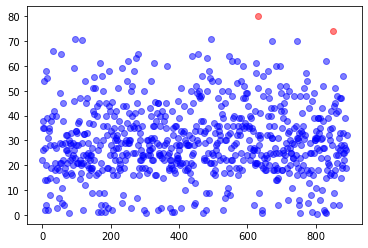

In [213]:
outliers = age[age < mu - 3*std].append(age[age > mu + 3*std])
clean = age.drop(index = outliers.index)
scatter(outliers,clean)

### $\pm$ 1.5 std

In [214]:
# 使用IQR
q1 = age.quantile(0.25)
q3 = age.quantile(0.75)
iqr = q3 - q1
print("Q1-1.5*iqr:\nvalue: {}".format(q1 - 1.5 * iqr))
print(age[age < q1 - 1.5 * iqr])

print("Q3+1.5*iqr:\nvalue: {}".format(q3 + 1.5 * iqr))
print(age[age > q3 + 1.5 * iqr])

Q1-1.5*iqr:
value: -6.6875
Series([], Name: Age, dtype: float64)
Q3+1.5*iqr:
value: 64.8125
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


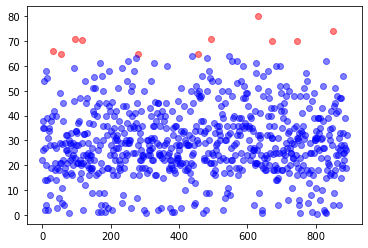

In [215]:
outliers = age[age < q1 - 1.5 * iqr].append(age[age > q3 + 1.5 * iqr])
clean = age.drop(index = outliers.index)
scatter(outliers,clean)

### IsolationForest

In [216]:
from sklearn.ensemble import IsolationForest
iforest  = IsolationForest(n_estimators=5)

# iforest 需要使用 2 維資料且不能有缺失值
prediction = iforest.fit_predict(np.array(age.dropna()).reshape(-1, 1))

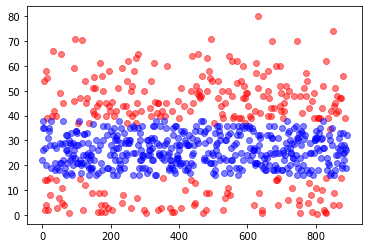

In [217]:
outliers = age.dropna()[prediction == -1]
clean = age.dropna()[prediction == 1]
scatter(outliers,clean)

### LocalOutlierFactor

In [218]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=80, metric='manhattan')

# lof 需要使用 2 維資料且不能有缺失值
prediction = lof.fit_predict(np.array(age.dropna()).reshape(-1, 1))

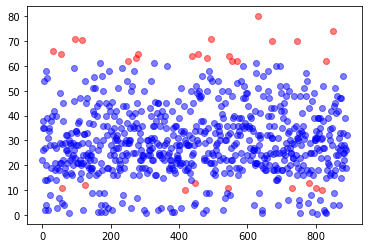

In [219]:
outliers = age.dropna()[prediction == -1]
clean = age.dropna()[prediction == 1]
scatter(outliers,clean)